In [ ]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

# 1. Simulate the cascade of misinformation using Sznajd model

In [53]:
G_fb = nx.read_edgelist("Group7/Facebook-Ego/1912.edges", create_using = nx.Graph(), nodetype = int)

# Initialize the Sznajd model
model = op.SznajdModel(G_fb)

unique_nodes = list(G_fb.nodes())


In [54]:

model_trends = {}

# Simulate for different initial infected numbers
for initial_infected in [5, 15, 30]:
    # Model Configuration
    config = mc.Configuration()
    config.add_model_initial_configuration("Infected", unique_nodes[:initial_infected])
    model.set_initial_status(config)

    # Simulation execution
    iterations = model.iteration_bunch(50) 
    trends = model.build_trends(iterations)
    model_trends[initial_infected] = trends


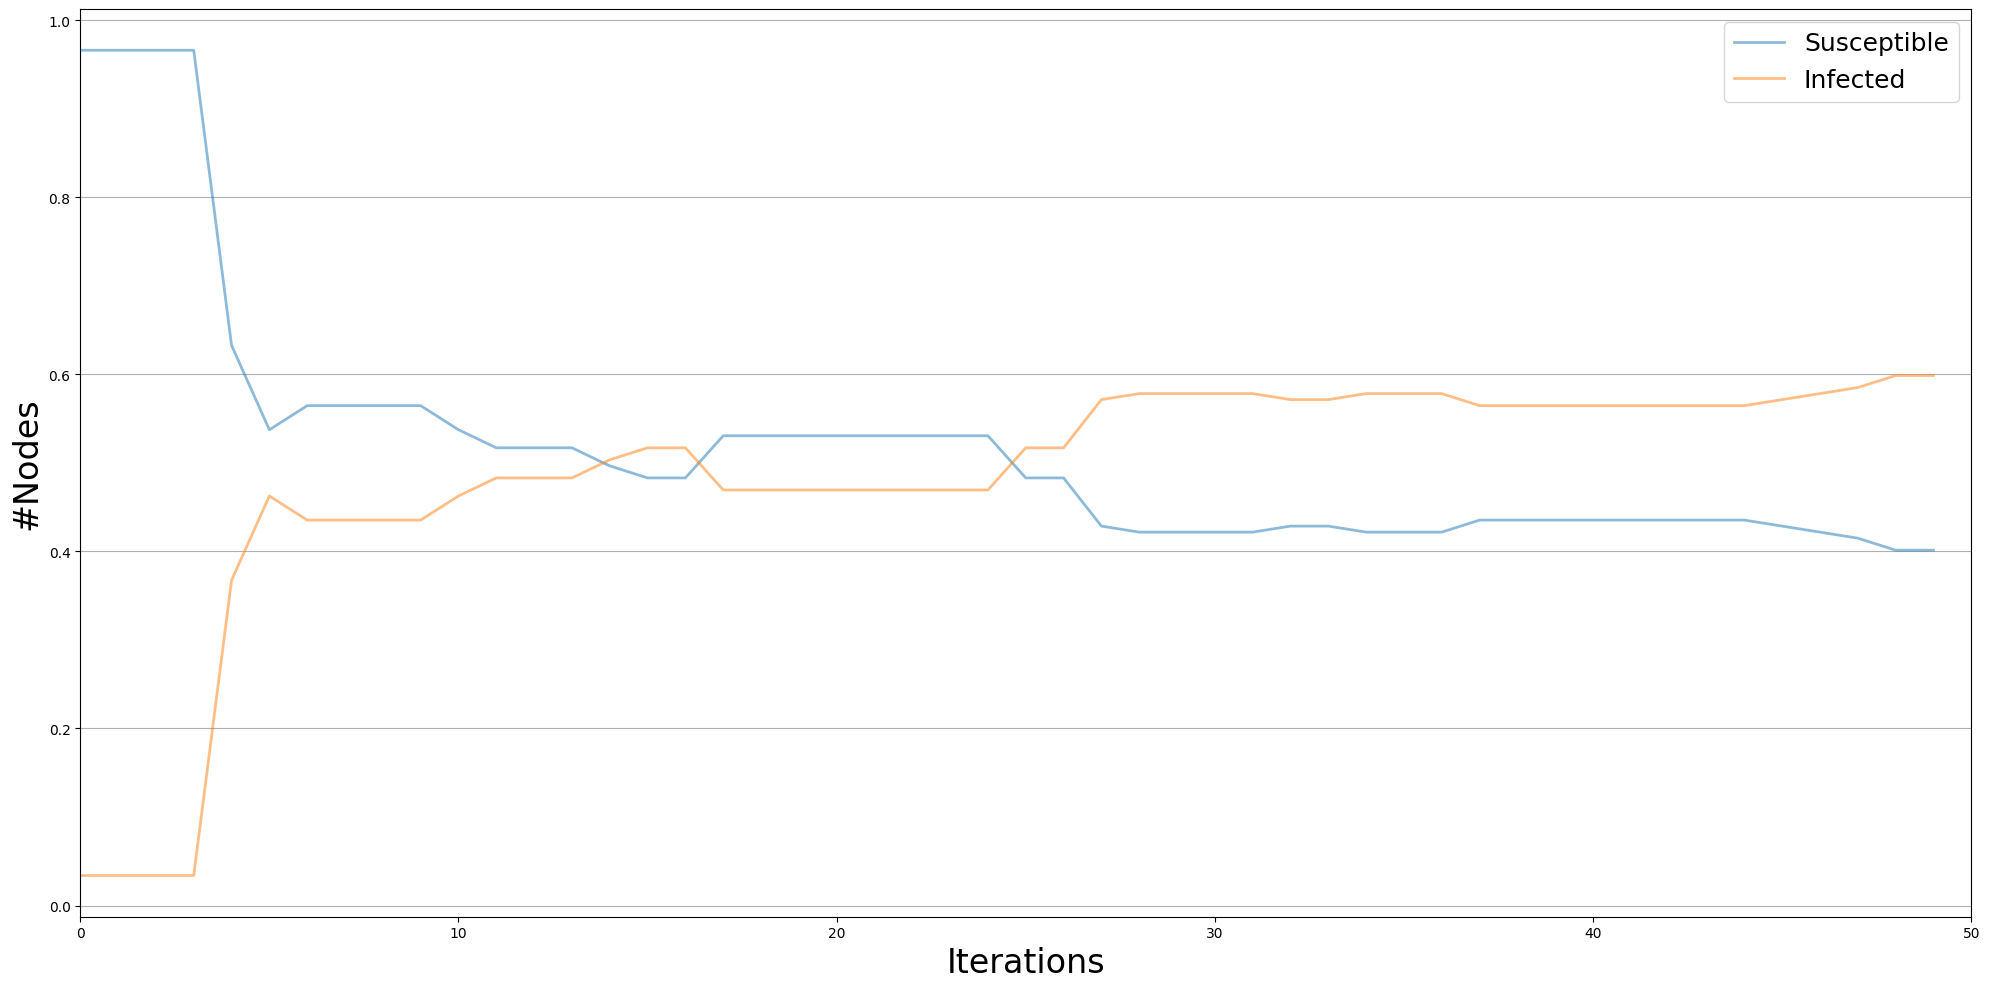

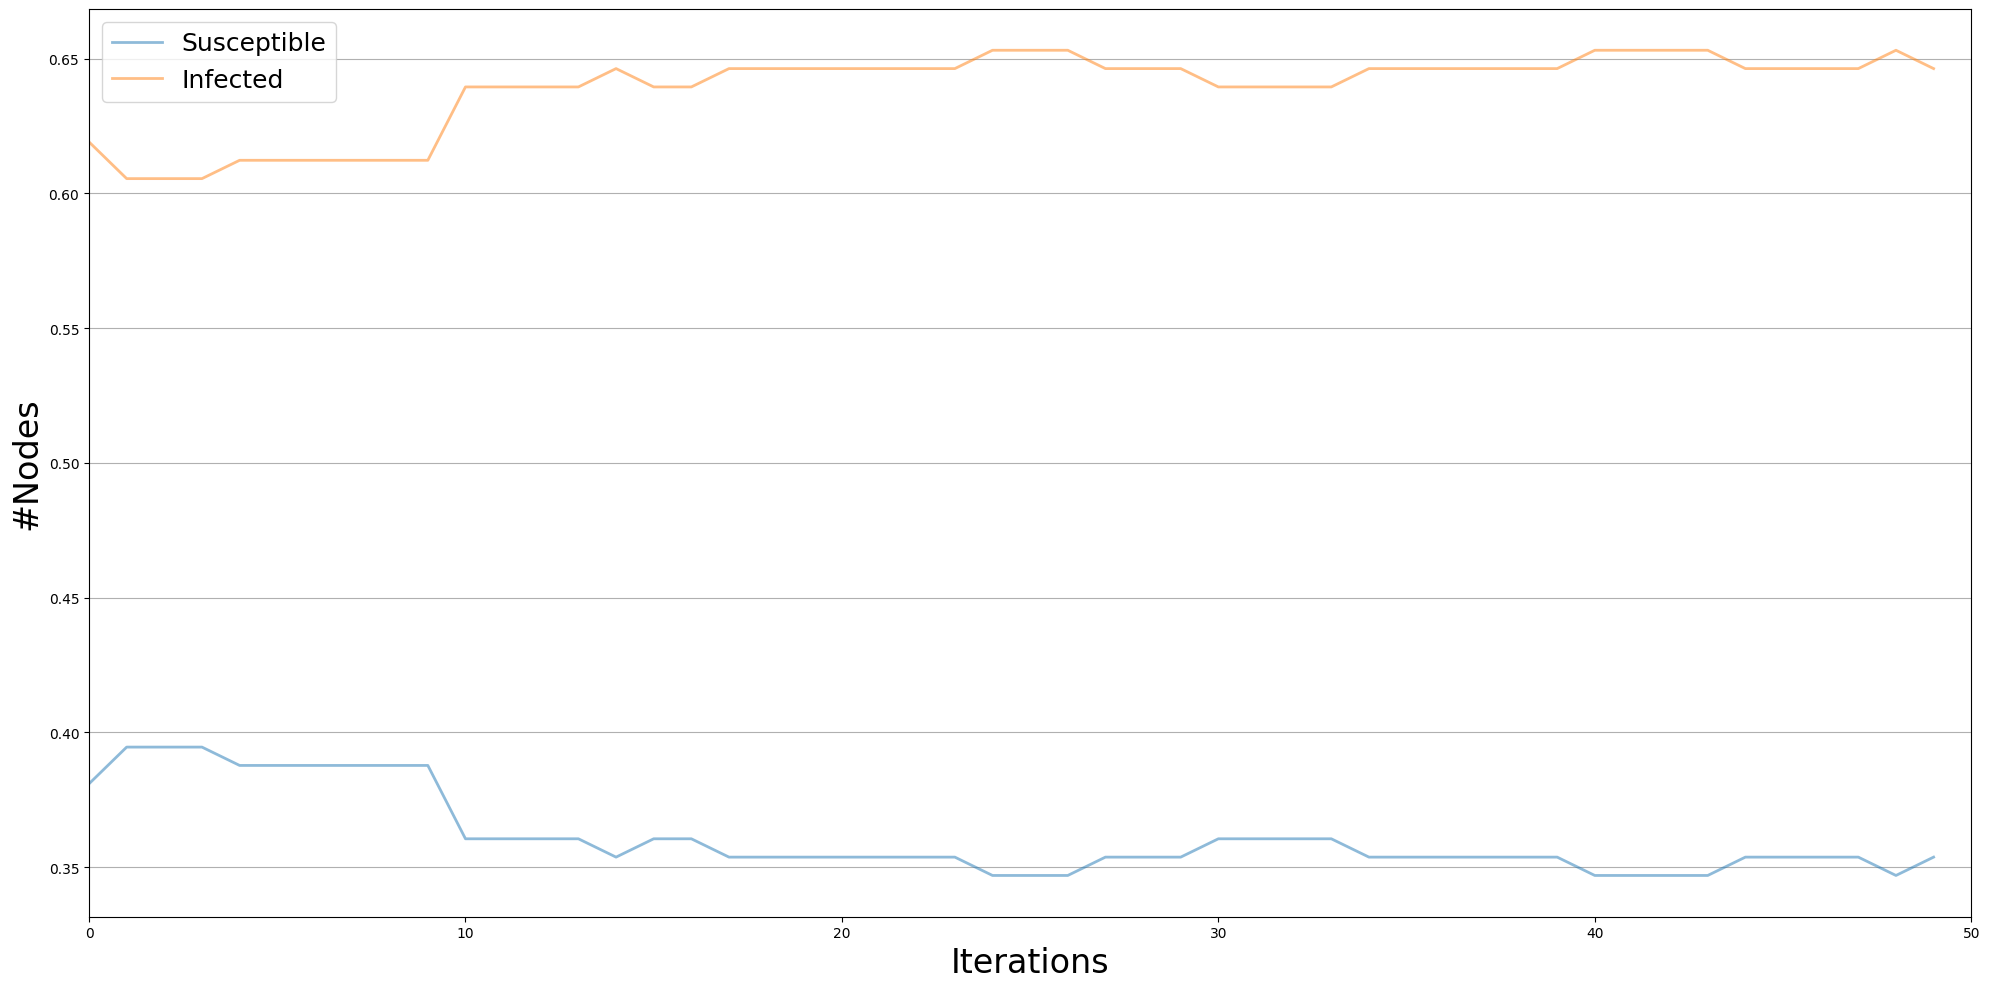

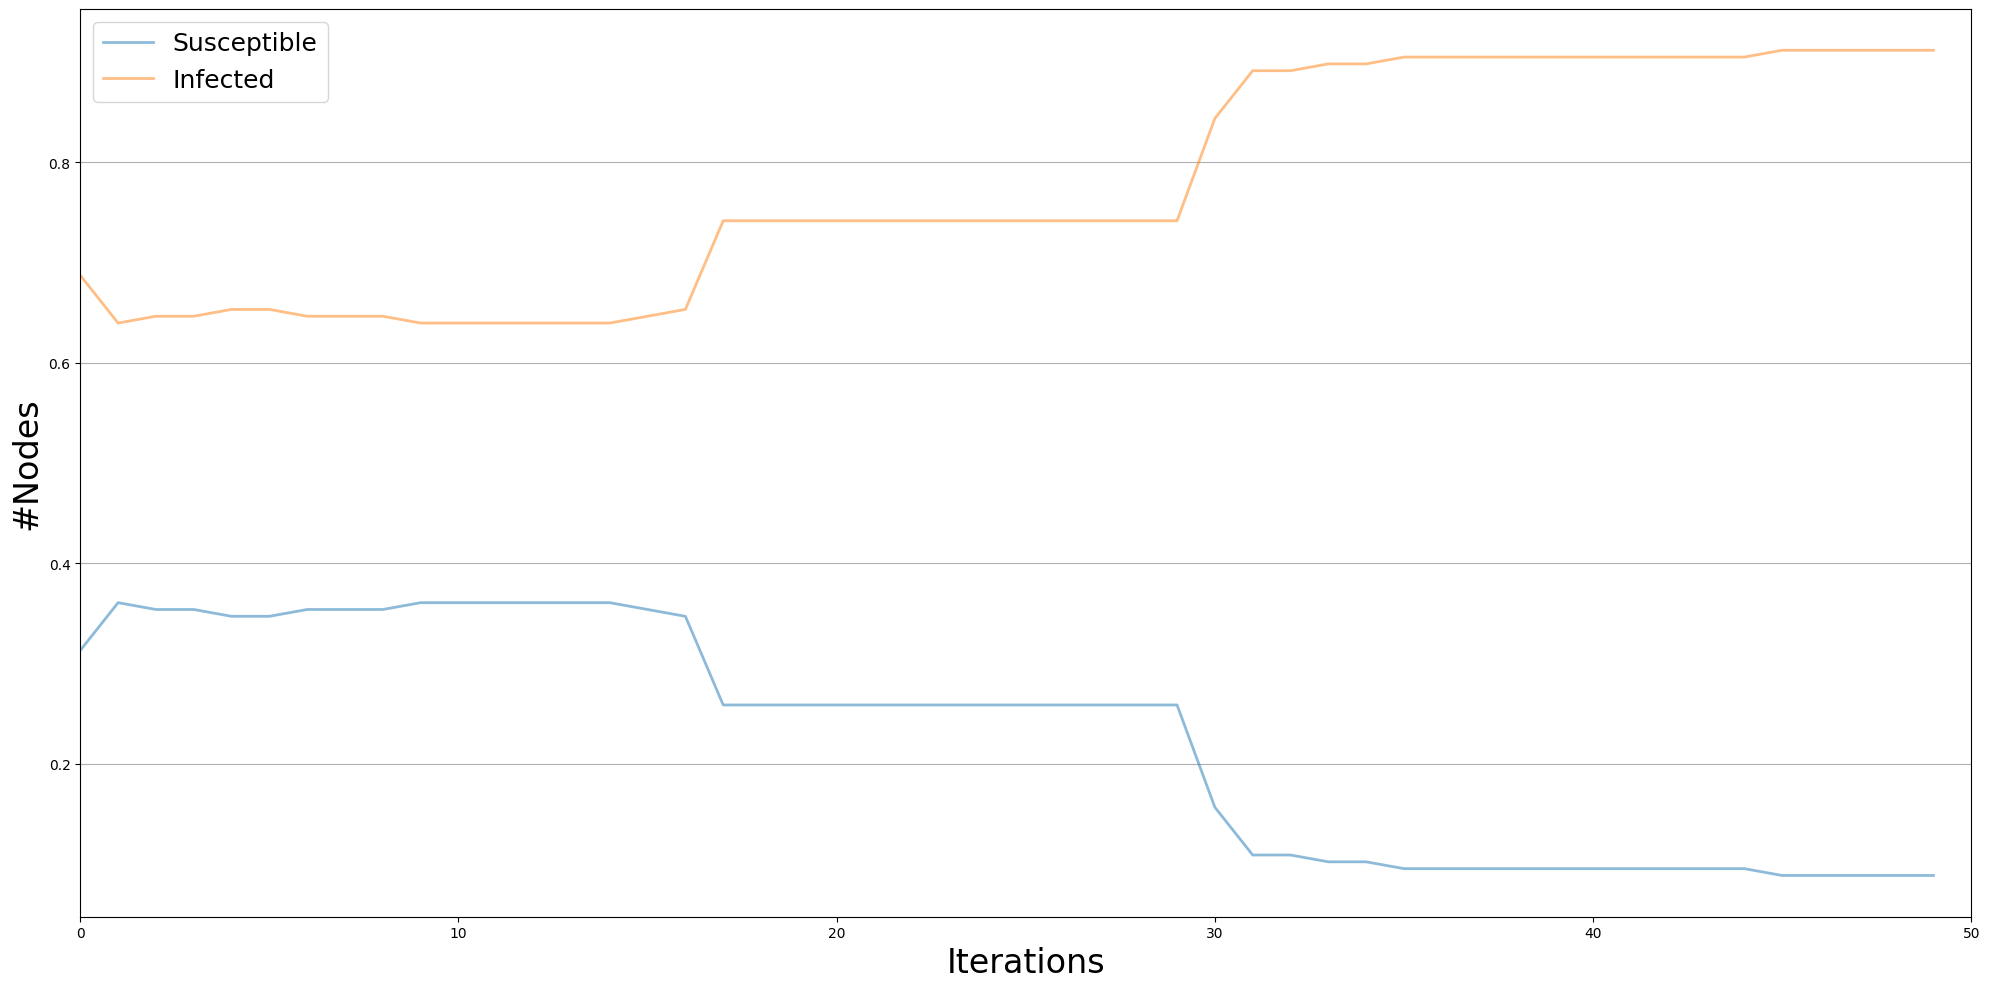

In [63]:
# Plot the diffusion trend for each initial infected number
for initial_infected, trend in model_trends.items():
    viz = DiffusionTrend(model, trend)
    viz.plot()



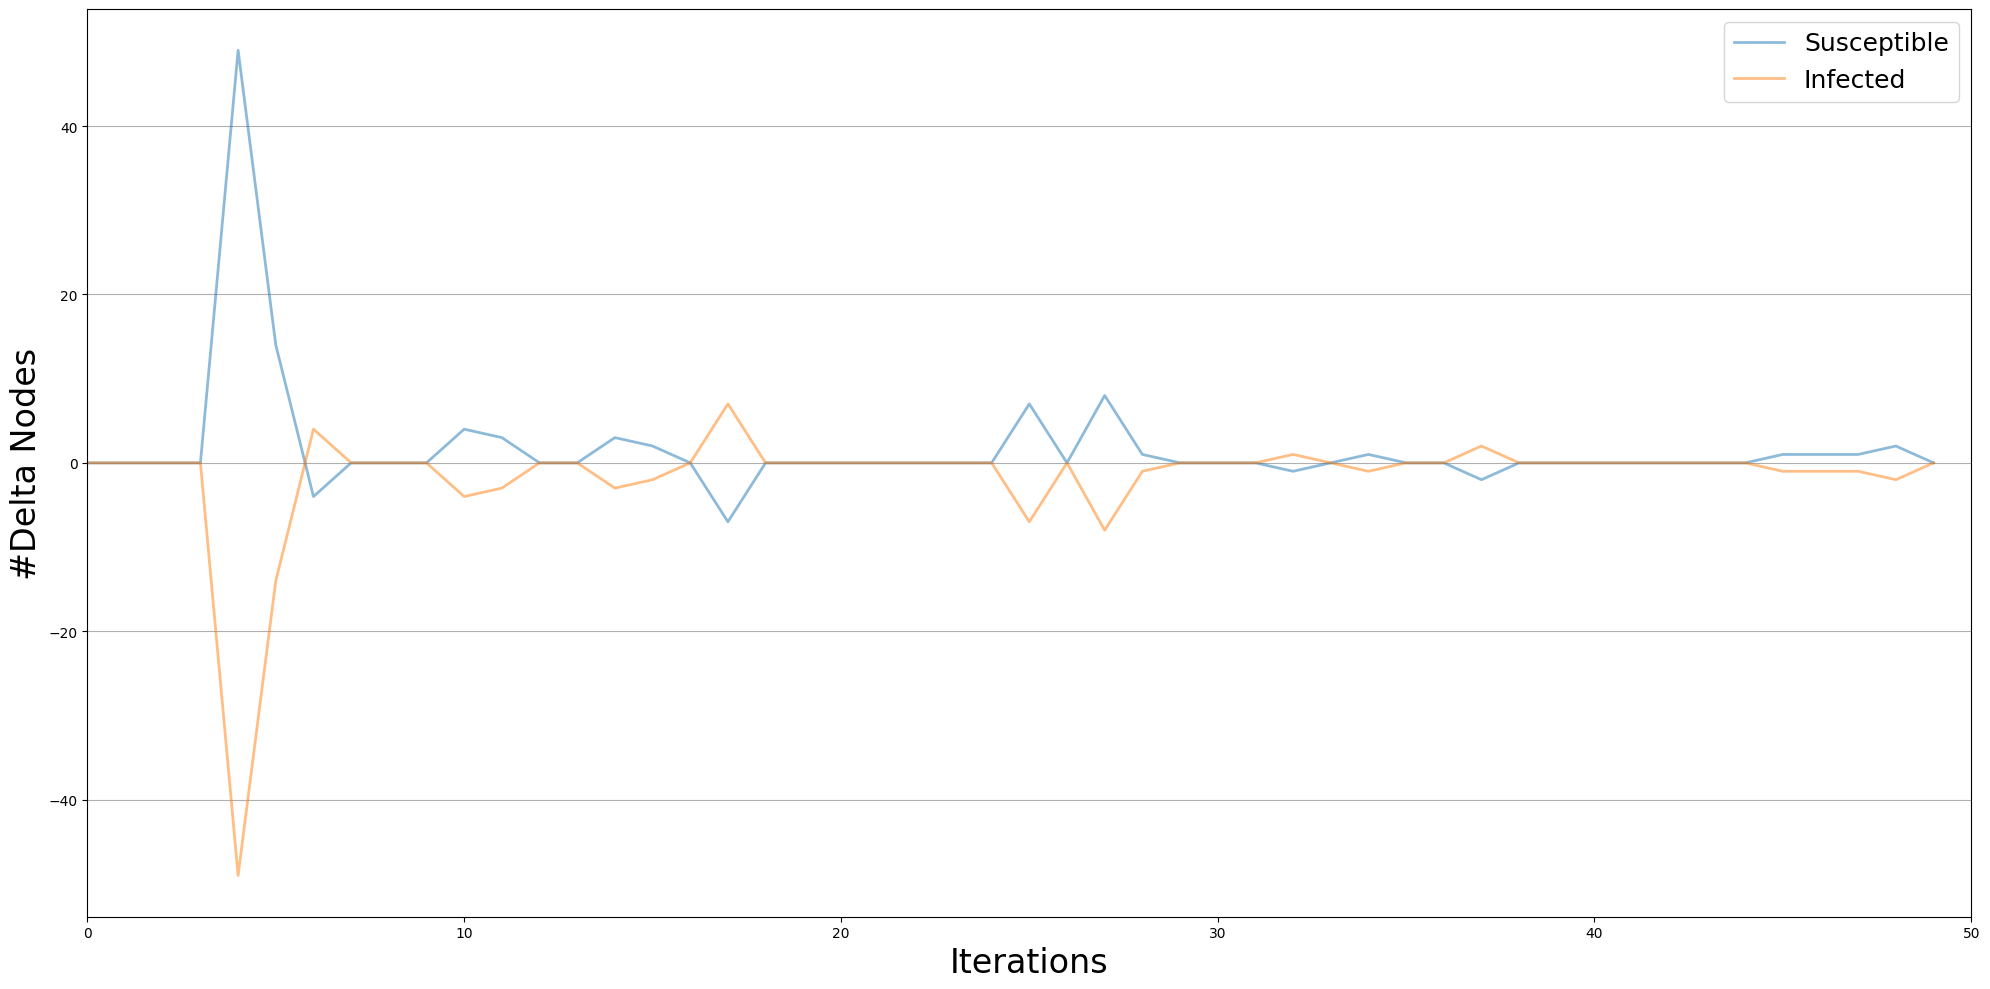

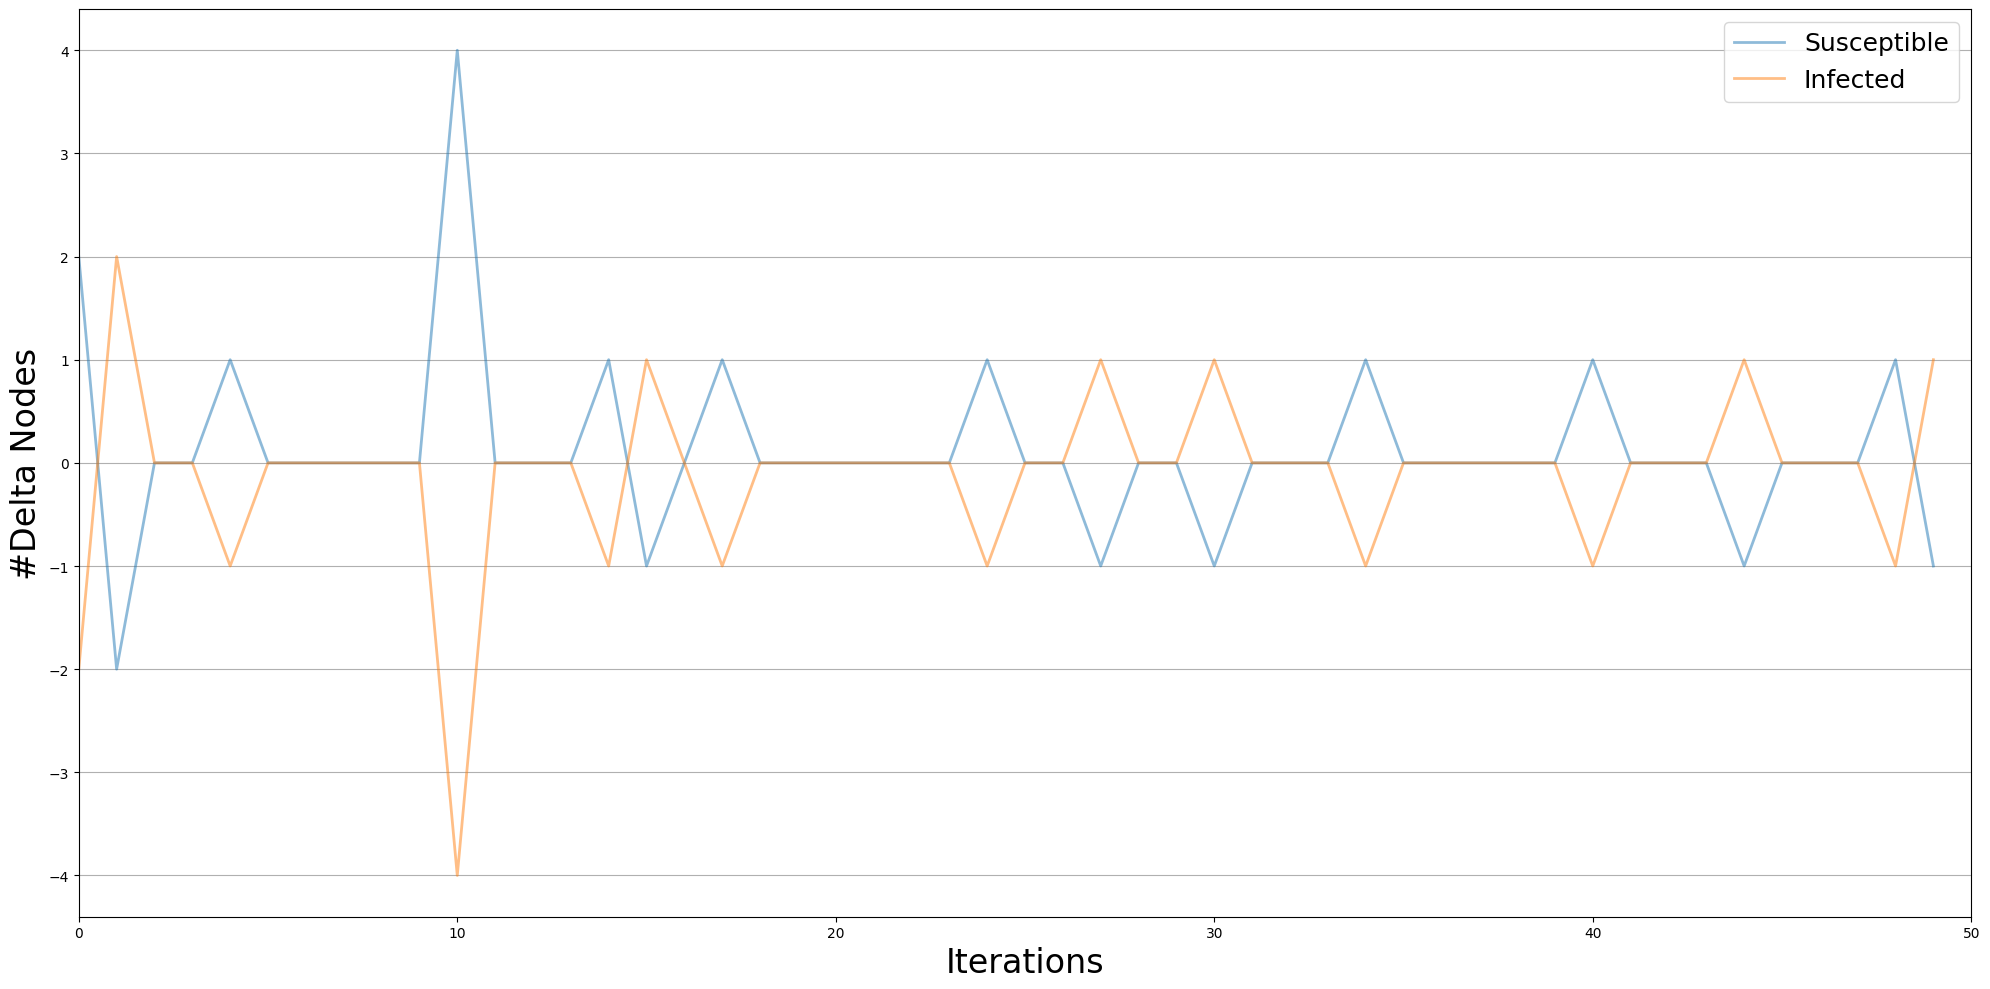

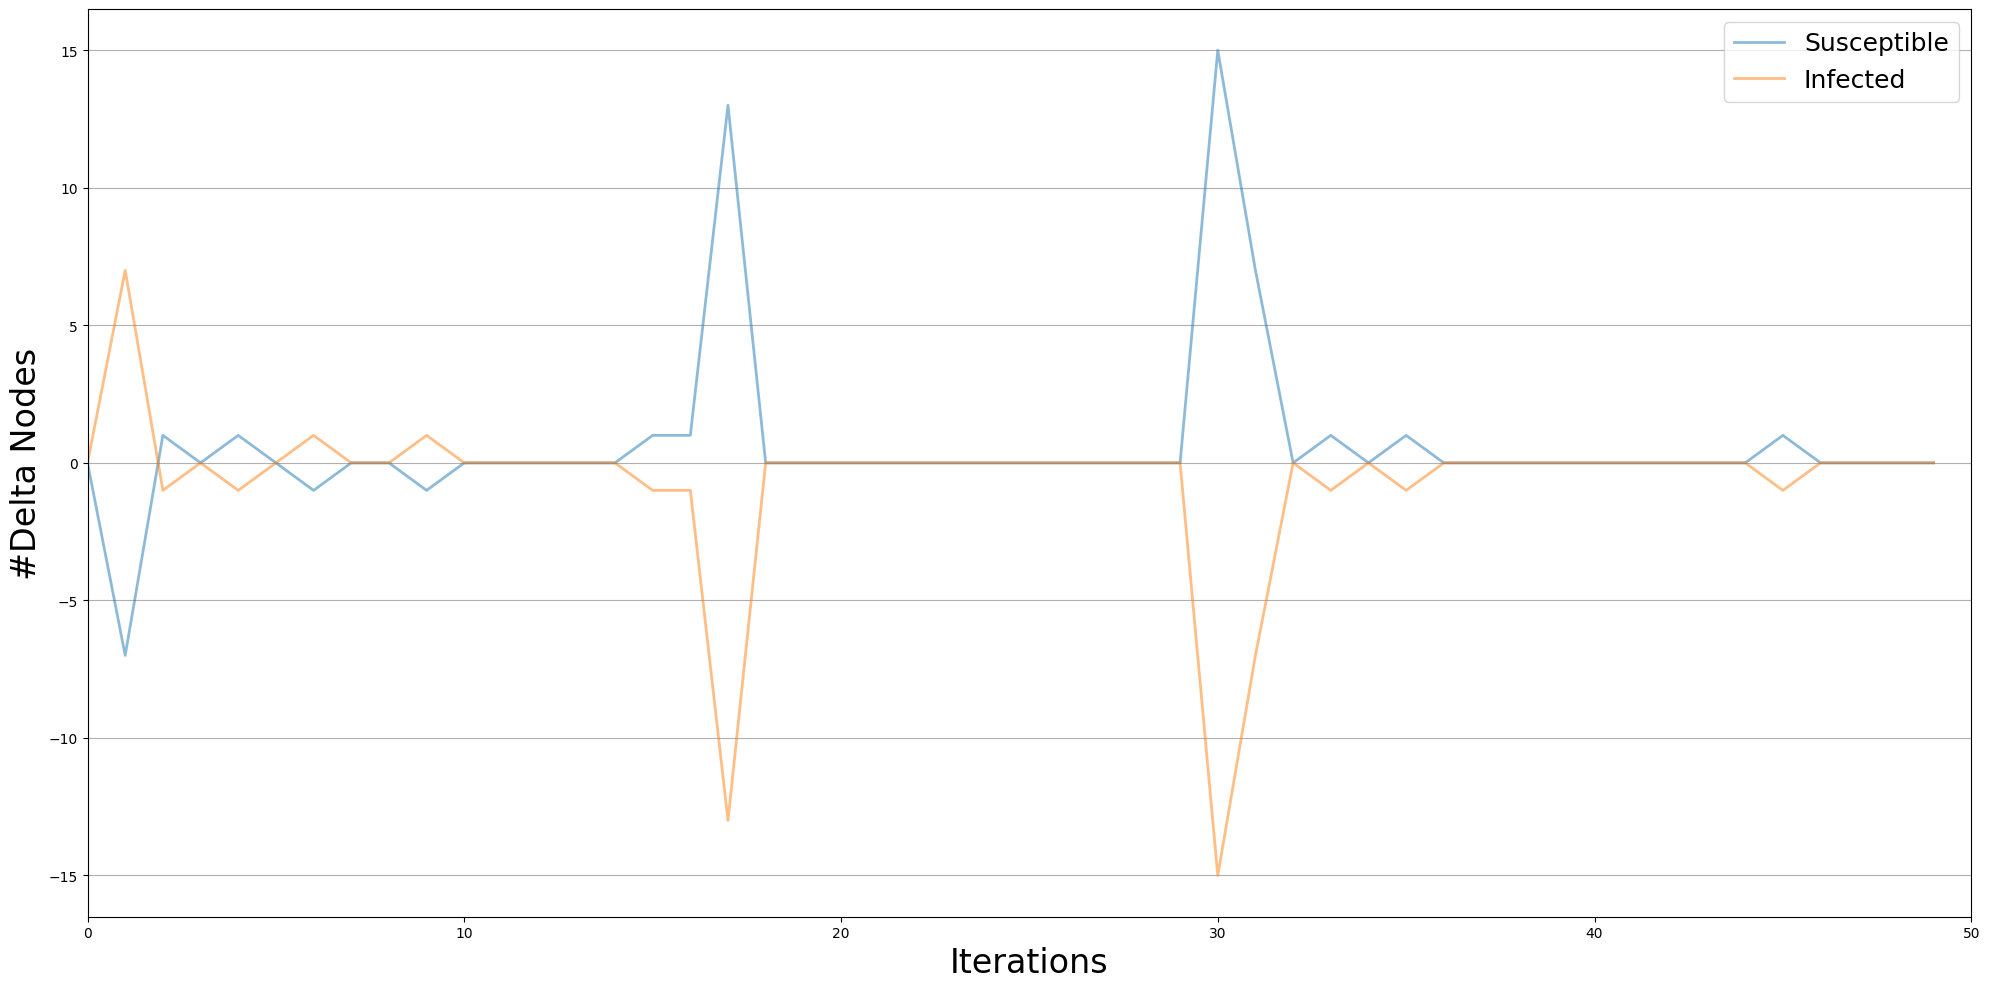

In [57]:
# Plotting the prevalence plot
for initial_infected, trend in model_trends.items():
    viz = DiffusionPrevalence(model, trend)
    viz.plot(percentile=90)



# 2. Simulate the cascade of epidemic using Sznajd model

In [71]:
model = ep.SIRModel(G_fb)

probabilities = [(0.5, 0.2), (0.3, 0.3), (0.4, 0.5)]

Sir_trends = {}
for infection_prob, removal_prob in probabilities:
    config = mc.Configuration()
    config.add_model_parameter("fraction_infected",0.05)
    config.add_model_parameter("beta", infection_prob)
    config.add_model_parameter("gamma", removal_prob)
    config.add_model_initial_configuration("Infected", unique_nodes[:10])

    model.set_initial_status(config)

    iterations = model.iteration_bunch(50)
    trends = model.build_trends(iterations)
    Sir_trends[(infection_prob, removal_prob)] = trends


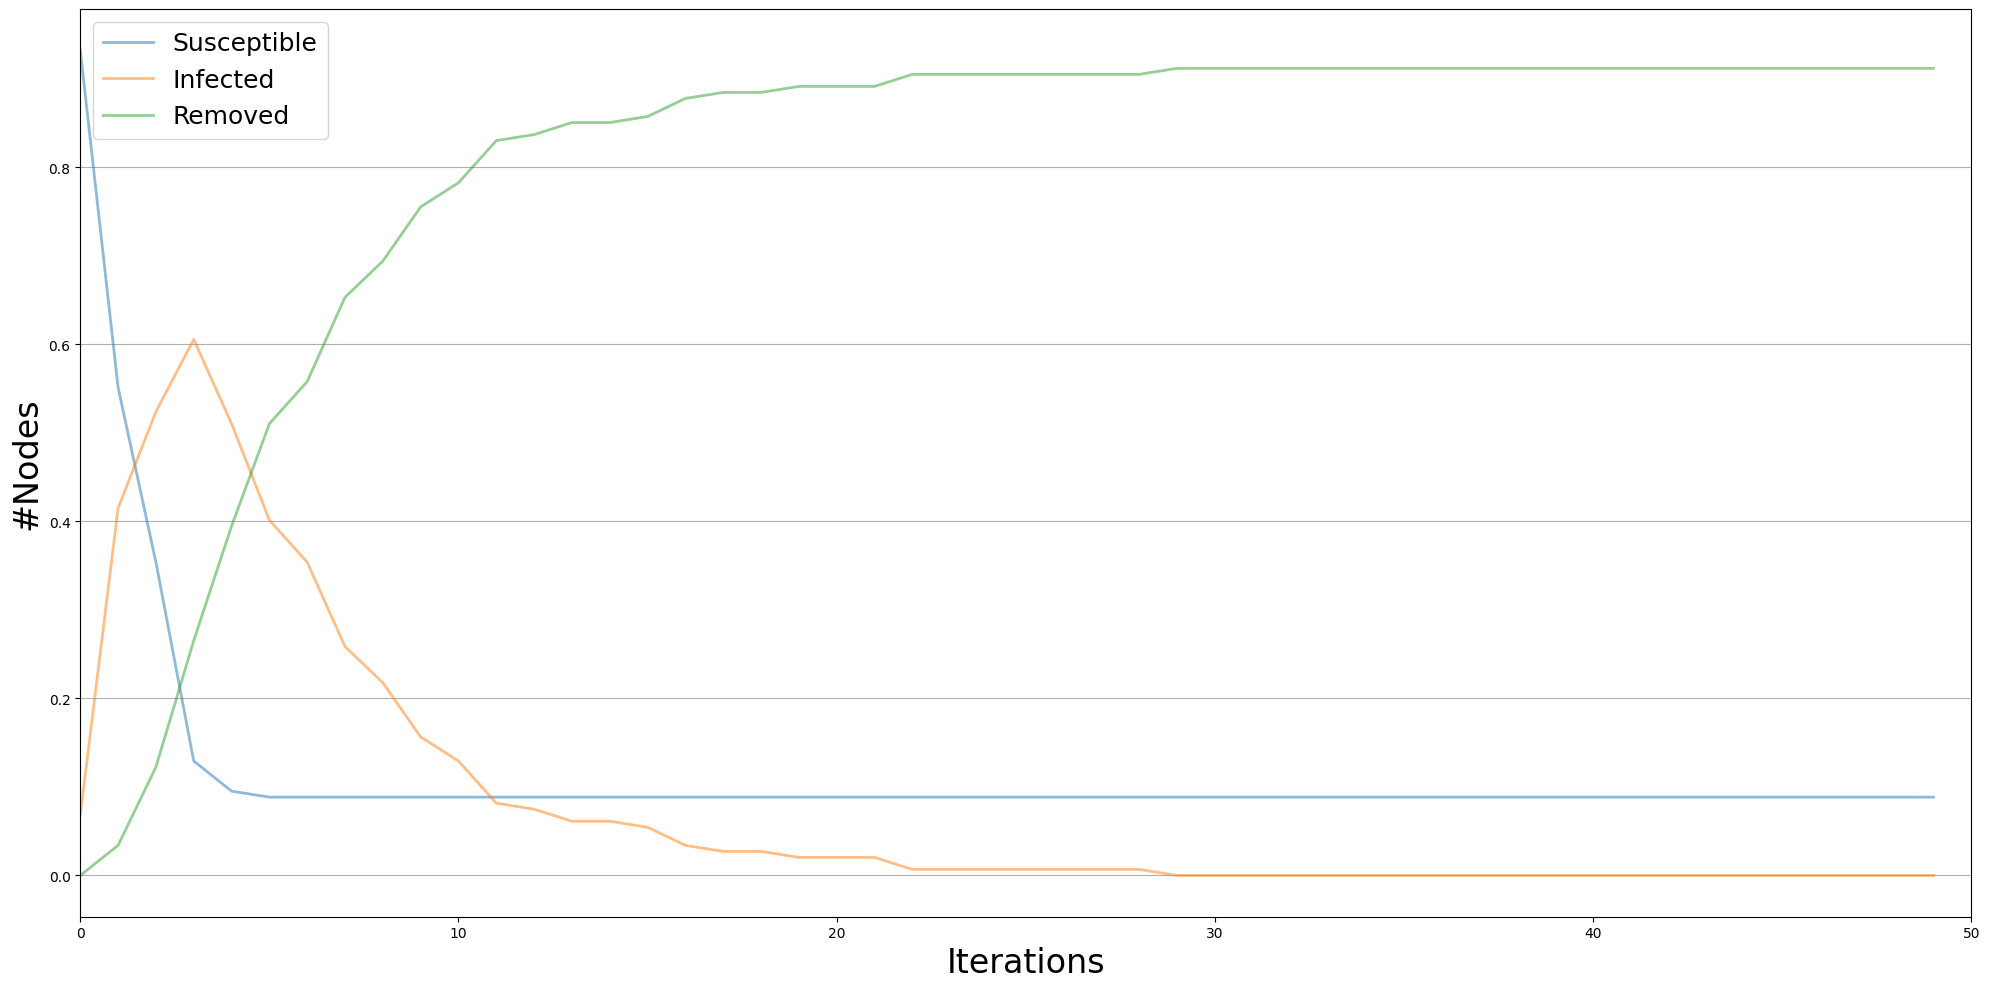

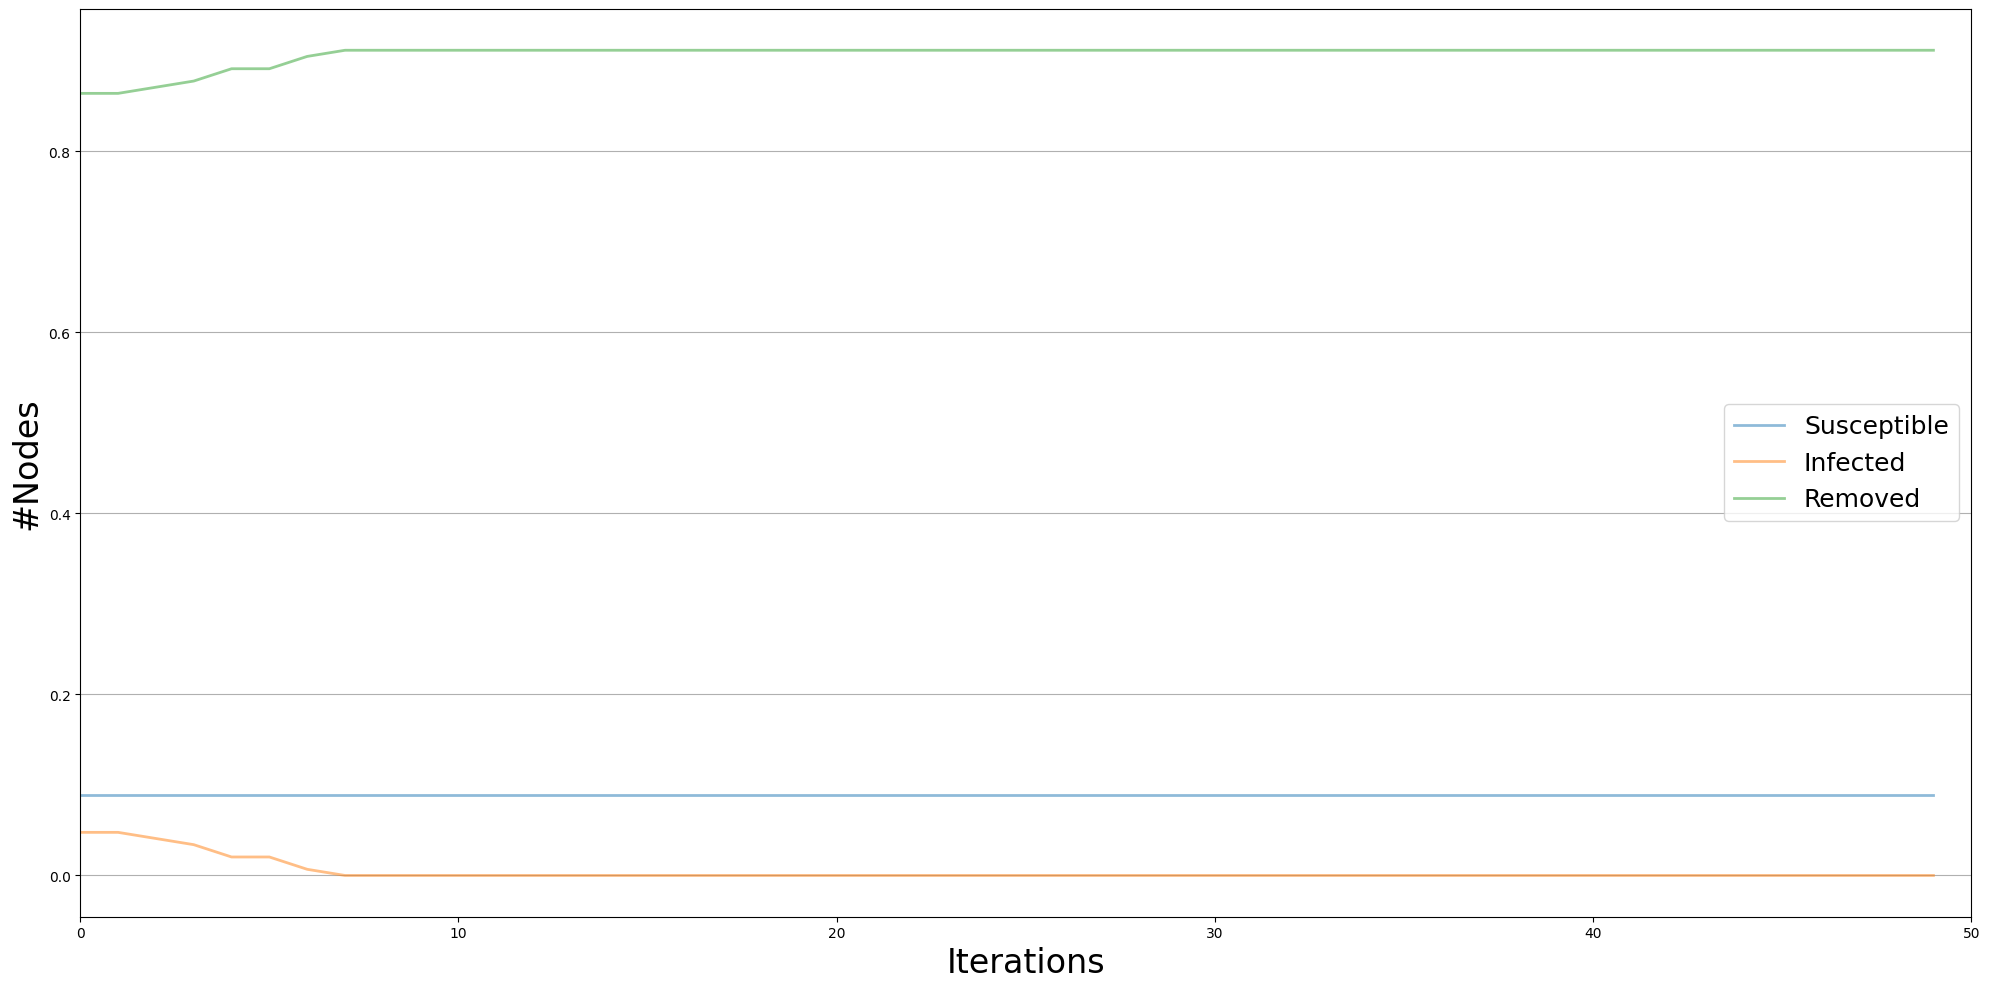

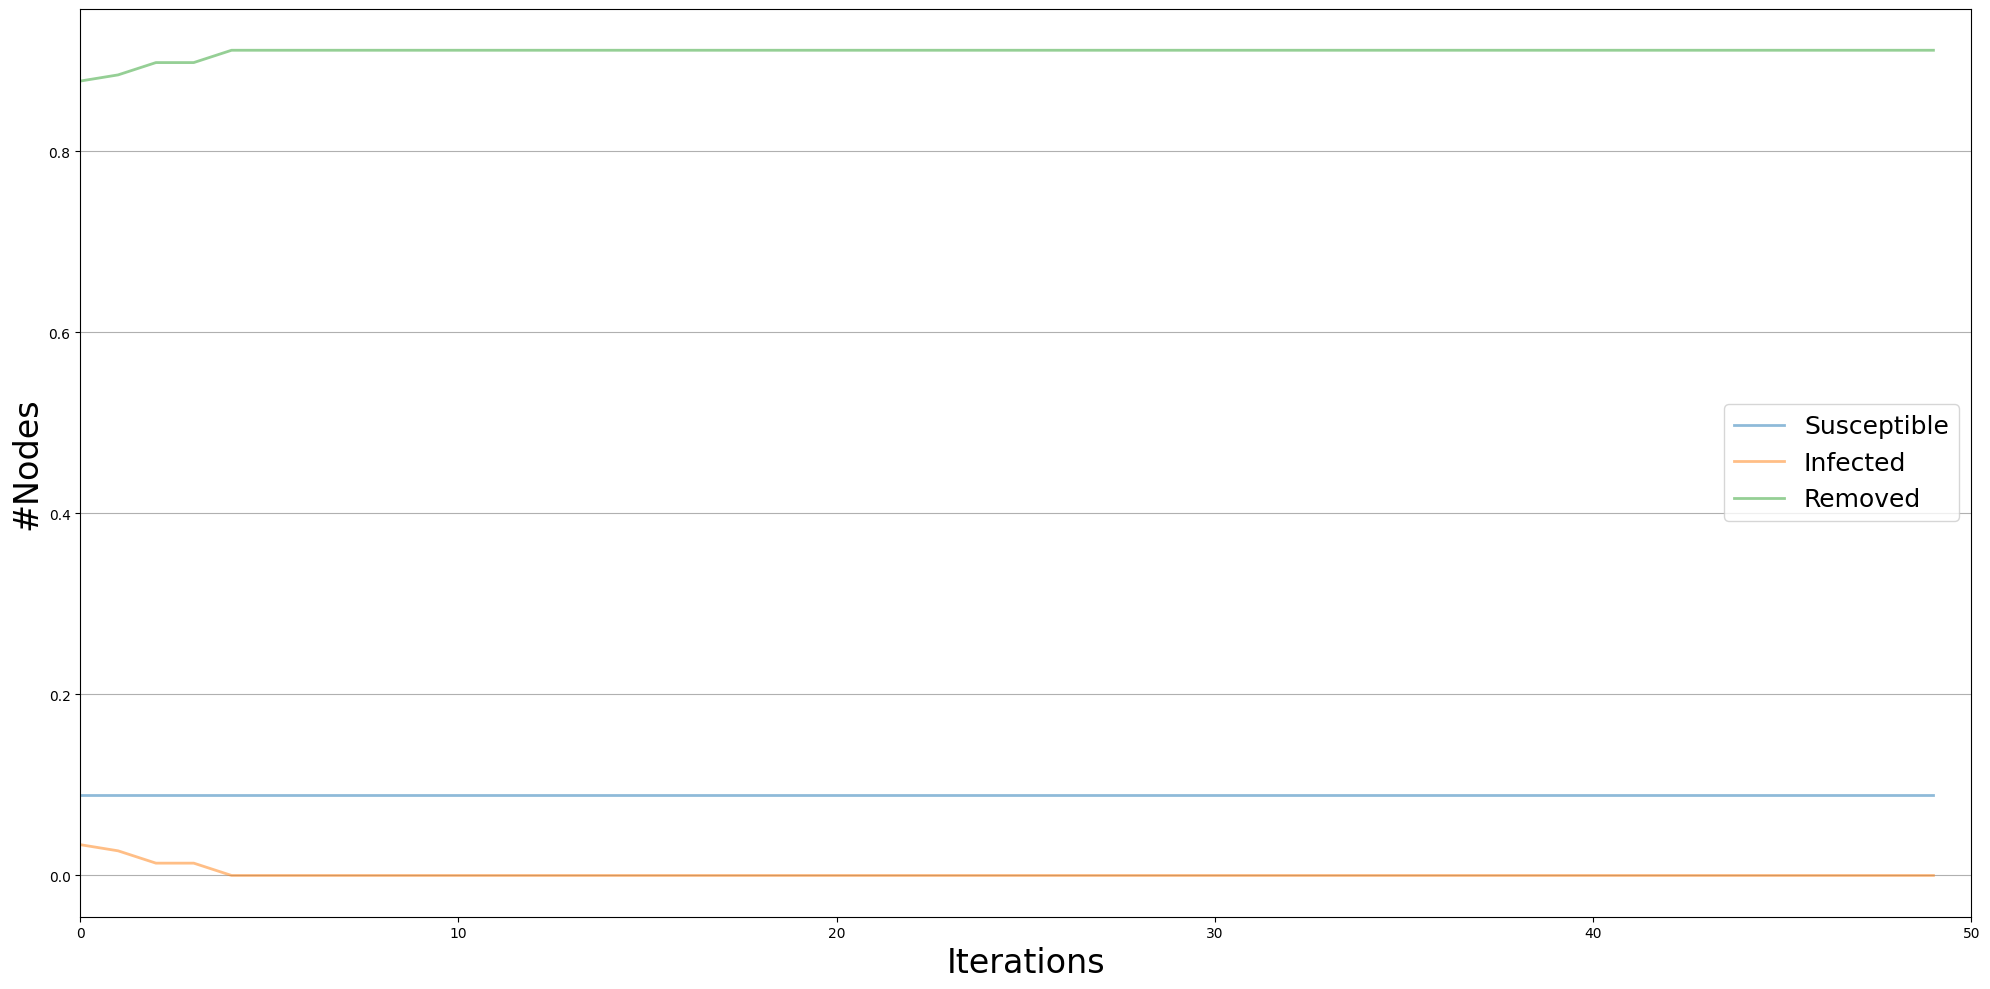

In [72]:
# Plot the diffusion trend for each probability pair
for prob_set, trend in Sir_trends.items():
    viz = DiffusionTrend(model, trend)
    viz.plot()


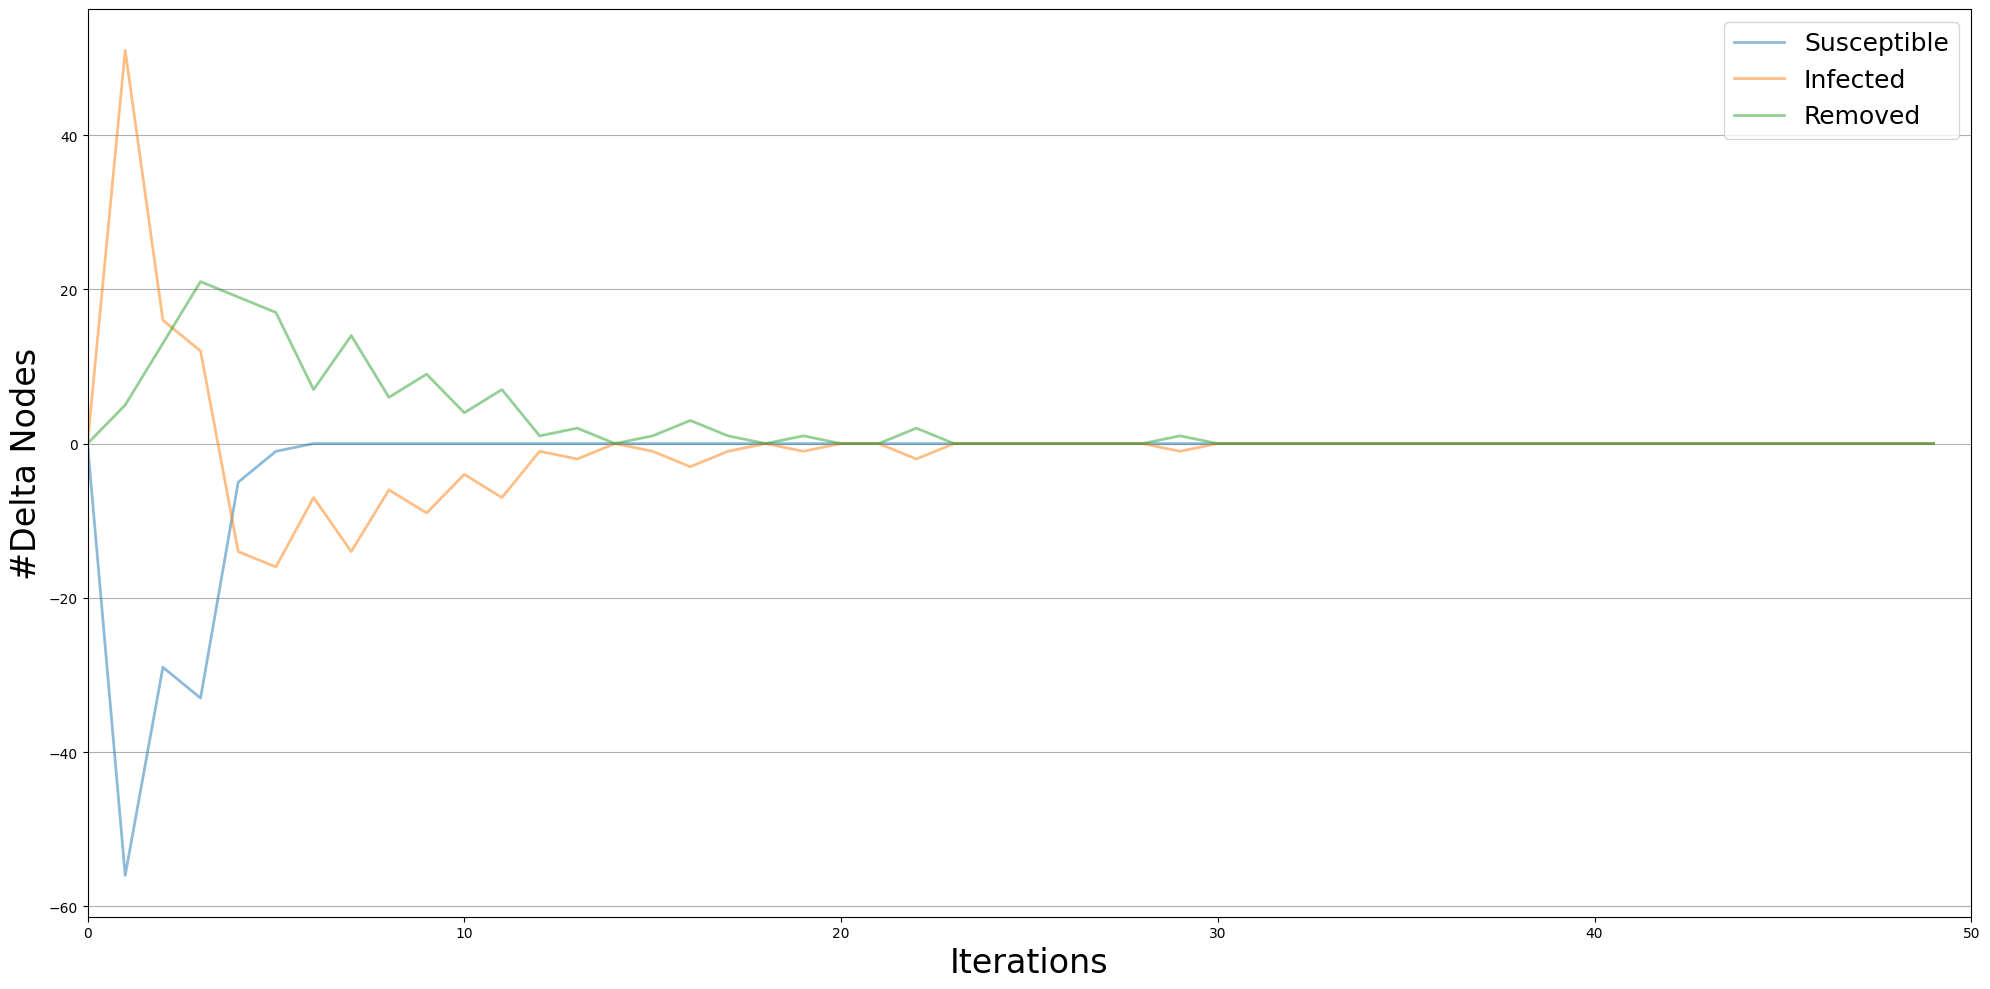

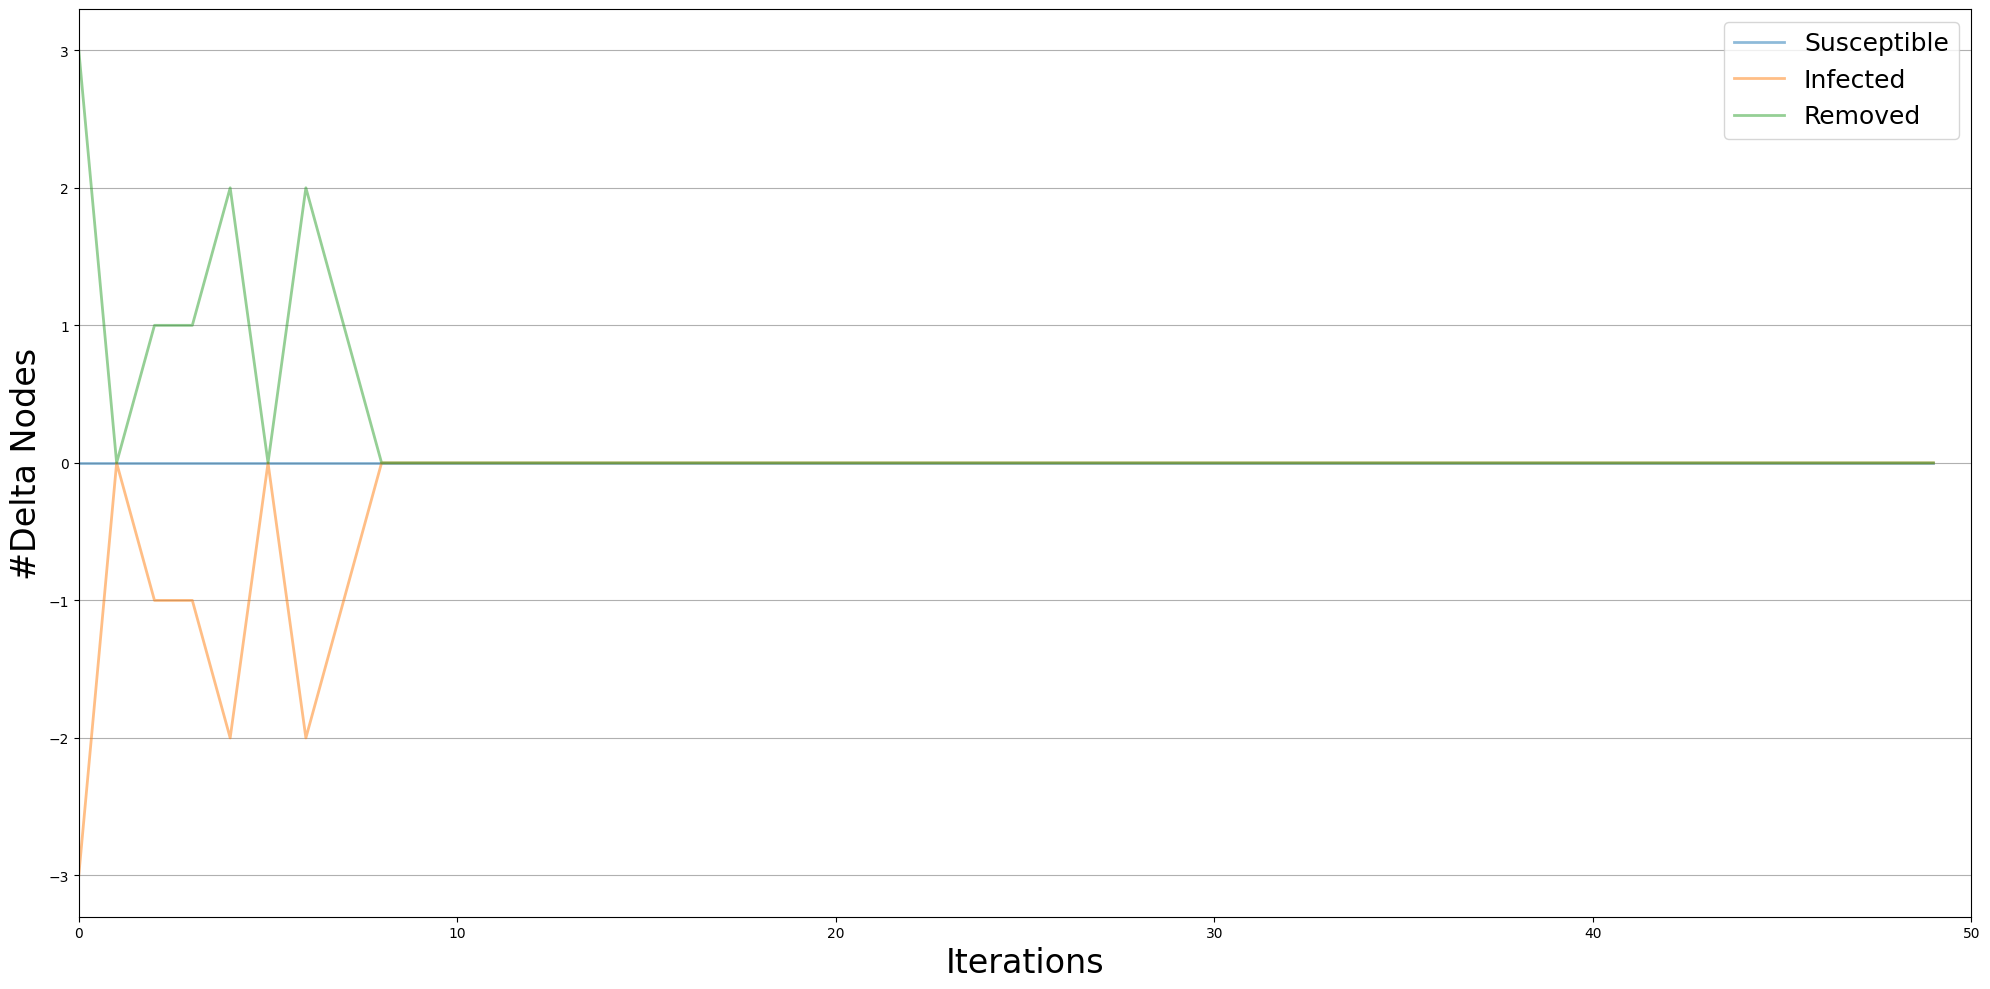

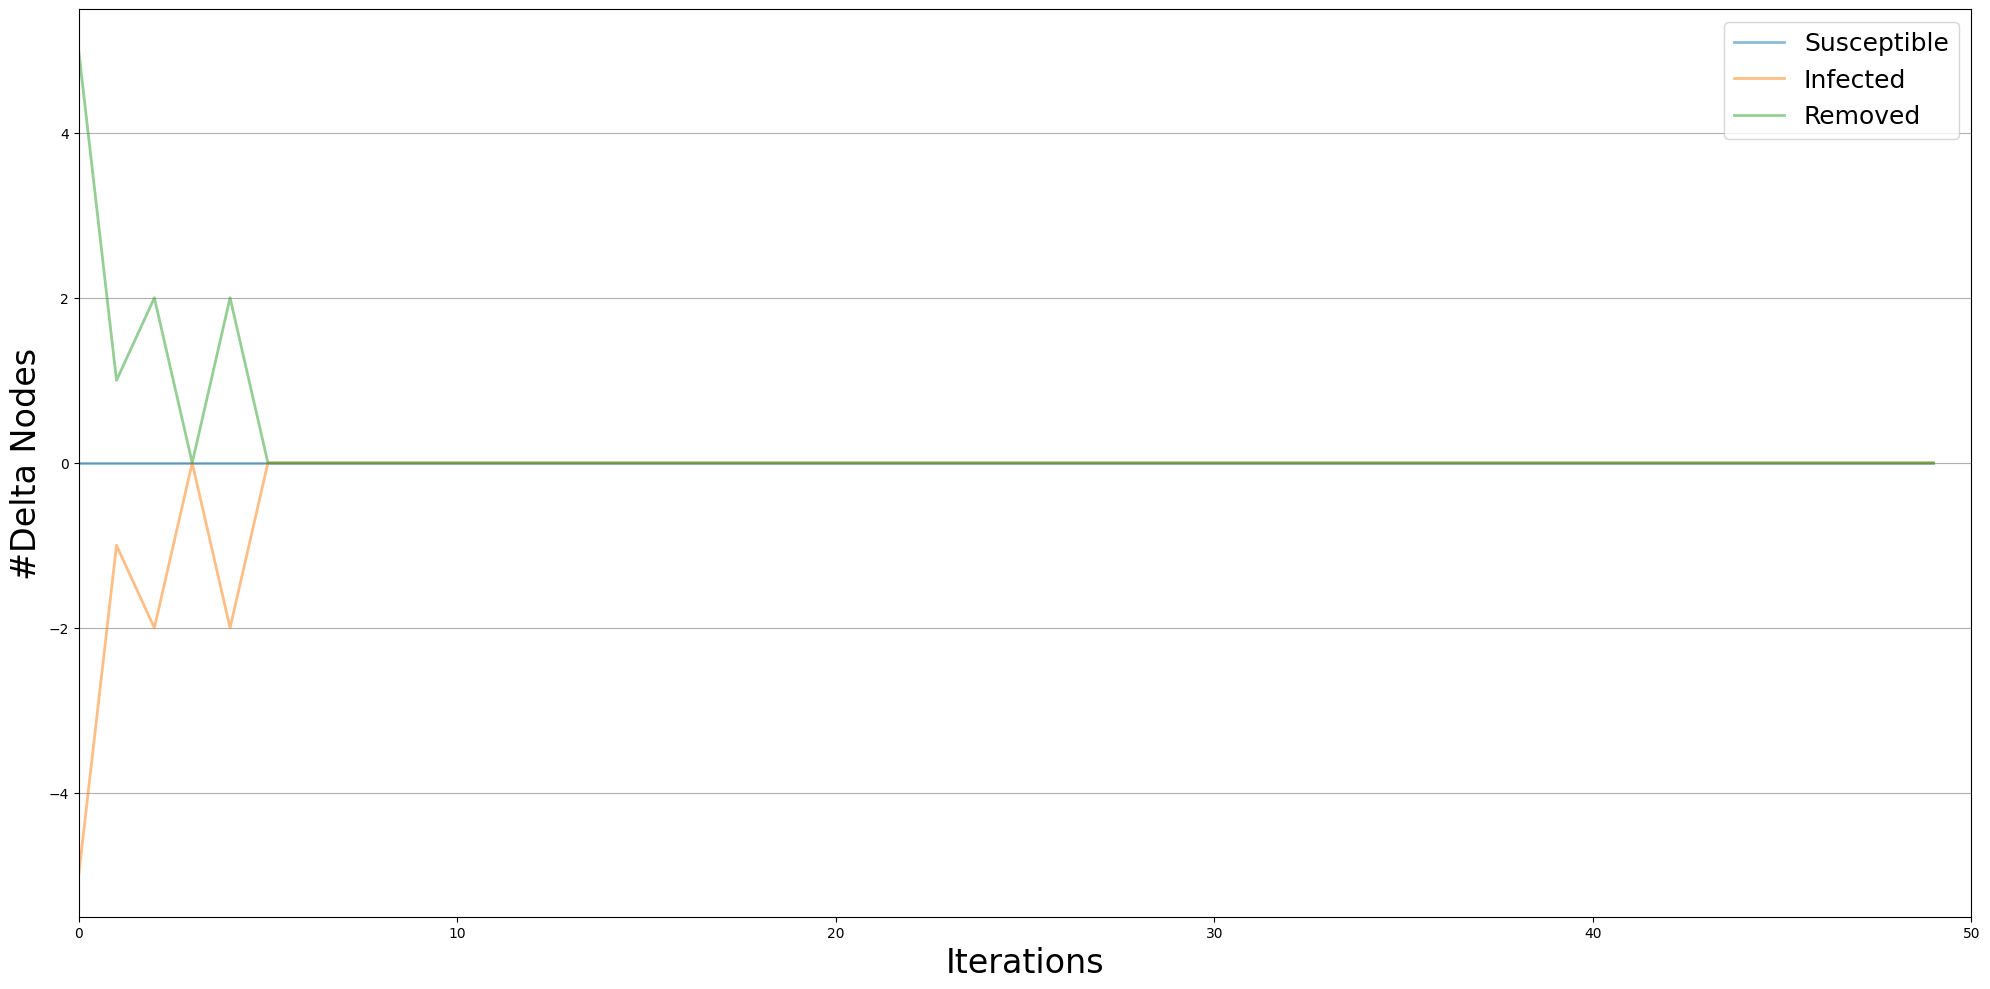

In [76]:
# Plotting the prevalence plot for each probability pair
for prob_set, trend in Sir_trends.items():
    viz = DiffusionPrevalence(model, trend)
    viz.plot()